# Setup

In [1]:
import os
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_openai import OpenAIEmbeddings
from numpy import dot, array
from numpy.linalg import norm
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import yaml

In [2]:
with open('config.yaml', 'r') as config_file:
    config = yaml.safe_load(config_file)
os.environ['OPENAI_API_KEY'] = config['OPENAI_API_KEY']

# Embedding

In [3]:
documents = [
    "Este é o primeiro documento. Ele contém informações importantes sobre o projeto.",
    "Este é o segundo documento. Ele contém informações importantes sobre o projeto.",
    "O terceiro documento oferece uma visão geral dos resultados esperados e métricas de sucesso."
]

In [4]:
# Dividir documentos em chunks
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=50,  
    chunk_overlap=10,
    length_function=len
)
chunks = text_splitter.create_documents(documents)

print("\nChunks gerados:")
for i, chunk in enumerate(chunks):
    print(f"Chunk {i+1}: {chunk.page_content}")


Chunks gerados:
Chunk 1: Este é o primeiro documento. Ele contém
Chunk 2: contém informações importantes sobre o projeto.
Chunk 3: Este é o segundo documento. Ele contém informações
Chunk 4: importantes sobre o projeto.
Chunk 5: O terceiro documento oferece uma visão geral dos
Chunk 6: geral dos resultados esperados e métricas de
Chunk 7: de sucesso.


In [5]:
print(f"\nNúmero total de chunks: {len(chunks)}")


Número total de chunks: 7


In [6]:
embeddings = OpenAIEmbeddings(model='text-embedding-ada-002')
print(embeddings)

client=<openai.resources.embeddings.Embeddings object at 0x7d8c9b3a6f90> async_client=<openai.resources.embeddings.AsyncEmbeddings object at 0x7d8c9b8c7d50> model='text-embedding-ada-002' dimensions=None deployment='text-embedding-ada-002' openai_api_version='' openai_api_base=None openai_api_type='' openai_proxy='' embedding_ctx_length=8191 openai_api_key=SecretStr('**********') openai_organization=None allowed_special=None disallowed_special=None chunk_size=1000 max_retries=2 request_timeout=None headers=None tiktoken_enabled=True tiktoken_model_name=None show_progress_bar=False model_kwargs={} skip_empty=False default_headers=None default_query=None retry_min_seconds=4 retry_max_seconds=20 http_client=None http_async_client=None check_embedding_ctx_length=True


In [7]:
embedded_chunks = embeddings.embed_documents([chunk.page_content for chunk in chunks])

In [8]:
# Mostrar os embeddings gerados
print("\nEmbeddings gerados (mostrando apenas os primeiros 5 elementos de cada):")
for i, embed in enumerate(embedded_chunks):
    print(f"Embedding {i+1}: {embed[:5]}...")


Embeddings gerados (mostrando apenas os primeiros 5 elementos de cada):
Embedding 1: [-0.0018670230638235807, 0.017166996374726295, 0.0011514644138514996, -0.020769629627466202, 0.0009896024130284786]...
Embedding 2: [-0.01712298020720482, 0.0015327243600040674, -0.008258078247308731, -0.026528745889663696, 0.005497690290212631]...
Embedding 3: [-0.003141103545203805, 0.026634005829691887, 0.009834683500230312, -0.03525689244270325, -0.007334556430578232]...
Embedding 4: [-0.004651214927434921, -0.013015211559832096, -0.007951086387038231, -0.028801359236240387, 0.01733541488647461]...
Embedding 5: [-0.01769501157104969, -0.0068399785086512566, 0.0027431845664978027, -0.02135695144534111, 0.03167577087879181]...
Embedding 6: [-0.024612564593553543, 0.003631029510870576, 0.01579531654715538, -0.025423968210816383, 0.010710523463785648]...
Embedding 7: [-0.030650222674012184, -0.020634496584534645, 0.027425264939665794, -0.02991608716547489, -0.016518084332346916]...


In [9]:
print(f"\nNúmero de elementos em cada embedding: {len(embedded_chunks[0])}")


Número de elementos em cada embedding: 1536


In [10]:
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

In [11]:
print("\nSimilaridades entre todos os chunks:")
similarities = []
for i in range(len(embedded_chunks)):
    for j in range(i + 1, len(embedded_chunks)):
        similarity = cosine_similarity(embedded_chunks[i], embedded_chunks[j])
        similarities.append((i, j, similarity))
        print(f"Similaridade entre o chunk {i+1} e o chunk {j+1}: {similarity:.2f}")


Similaridades entre todos os chunks:
Similaridade entre o chunk 1 e o chunk 2: 0.83
Similaridade entre o chunk 1 e o chunk 3: 0.90
Similaridade entre o chunk 1 e o chunk 4: 0.81
Similaridade entre o chunk 1 e o chunk 5: 0.83
Similaridade entre o chunk 1 e o chunk 6: 0.77
Similaridade entre o chunk 1 e o chunk 7: 0.78
Similaridade entre o chunk 2 e o chunk 3: 0.86
Similaridade entre o chunk 2 e o chunk 4: 0.94
Similaridade entre o chunk 2 e o chunk 5: 0.81
Similaridade entre o chunk 2 e o chunk 6: 0.78
Similaridade entre o chunk 2 e o chunk 7: 0.81
Similaridade entre o chunk 3 e o chunk 4: 0.81
Similaridade entre o chunk 3 e o chunk 5: 0.85
Similaridade entre o chunk 3 e o chunk 6: 0.78
Similaridade entre o chunk 3 e o chunk 7: 0.78
Similaridade entre o chunk 4 e o chunk 5: 0.80
Similaridade entre o chunk 4 e o chunk 6: 0.79
Similaridade entre o chunk 4 e o chunk 7: 0.84
Similaridade entre o chunk 5 e o chunk 6: 0.80
Similaridade entre o chunk 5 e o chunk 7: 0.77
Similaridade entre o c

# Visualização

In [12]:
embedded_chunks_array = array(embedded_chunks)

In [13]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(embedded_chunks_array)

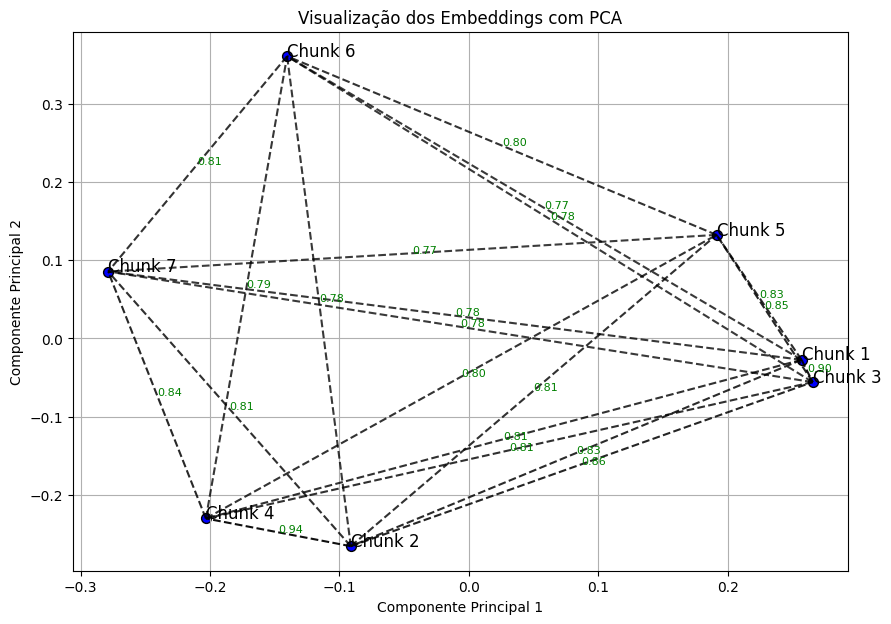

In [14]:
plt.figure(figsize=(10, 7))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(pca_result[i, 0], pca_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([pca_result[i, 0], pca_result[j, 0]], [pca_result[i, 1], pca_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (pca_result[i, 0] + pca_result[j, 0]) / 2
    mid_y = (pca_result[i, 1] + pca_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

In [15]:
tsne = TSNE(n_components=2, perplexity=2, max_iter=300)
tsne_result = tsne.fit_transform(embedded_chunks_array)

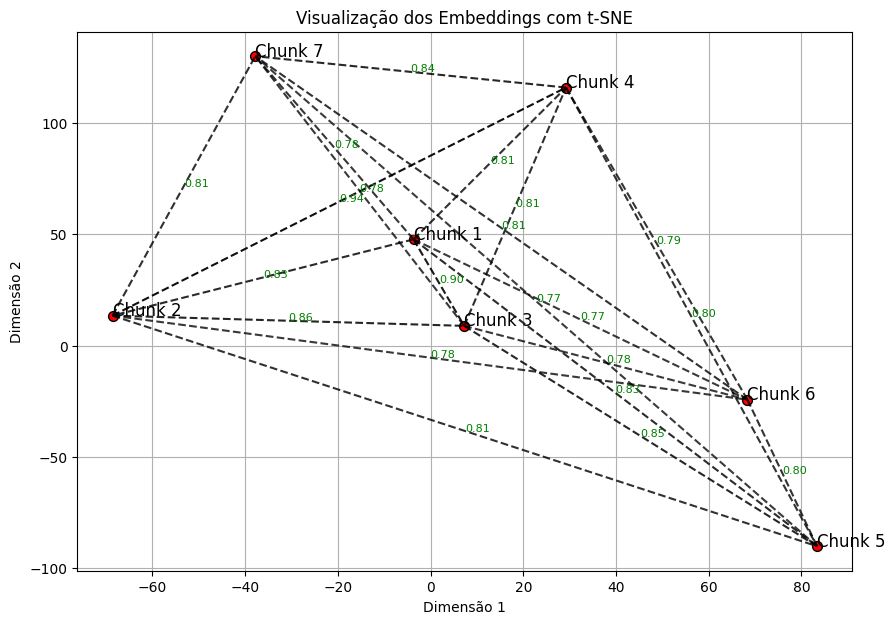

In [16]:
plt.figure(figsize=(10, 7))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c='red', edgecolor='k', s=50)
for i, chunk in enumerate(chunks):
    plt.text(tsne_result[i, 0], tsne_result[i, 1], f'Chunk {i+1}', fontsize=12)
for (i, j, similarity) in similarities:
    plt.plot([tsne_result[i, 0], tsne_result[j, 0]], [tsne_result[i, 1], tsne_result[j, 1]], 'k--', alpha=similarity)
    mid_x = (tsne_result[i, 0] + tsne_result[j, 0]) / 2
    mid_y = (tsne_result[i, 1] + tsne_result[j, 1]) / 2
    plt.text(mid_x, mid_y, f'{similarity:.2f}', fontsize=8, color='green')
plt.title('Visualização dos Embeddings com t-SNE')
plt.xlabel('Dimensão 1')
plt.ylabel('Dimensão 2')
plt.grid(True)
plt.show()